In [25]:
from sympy import MatrixSymbol, Matrix, Identity

import sympy as sym
import pandas as pd

sym.init_printing()
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import control
import random

# IDENTIFICACIÓN DE SISTEMAS

Profesor: Jairo Alberto Cuéllar Guarnizo  
Programa: Ingeniería en Automatización y Control

# Introducción a la Optimización

## El problema de la optimización

La optimización se refiere a los parámetros desconocidos como variable de decisión ($\theta$), frente a una función objetivo que depende de los datos medidos usualmente llamados Y. Por ejemplo para Mínimos cuadrados, el problema de optimización es minimizar el error existente entre el vector Y y el modelo de predicción $M(\theta)$. La función a minimizar sería:

$$f(\theta):=|Y - M(\theta)|^2$$

Para efectos de los siguientes ejercicios simplemente se llamará "x" a la variable de decisión desconocida en el problema de optimización (equivalente a $\theta$).

$$\min_{x \epsilon D} f(x)$$

Donde D es un espacio vectorial $R^n$.

## Condiciones de optimización

### * Condiciones de primer orden

Si $\bar{x}$ es un punto de minimización local de f(x) es llamado "punto estacionario" si su gradiente es 0.

$$\bigtriangledown f(\bar{x}) = 0$$

El punto estacionario o la estacionariedad es necesaria pero no es suficiente condicion para la optimalidad. Por tanto es necesario que para la función de costo f(x) se evalúe las derivadas de orden superior o de segundo orden, con el fin de definir si el punto $\bar{x}$ es un mínimo o no.

### Condiciones de segundo orden

La Matriz Hessiana de f(x) debe ser simétrica y positiva semidefinida.

$$\bigtriangledown^2 f(\bar{x}) \geqslant 0$$

Esta inecuación matricial la podemos interpretar como que todos los autovalores de la matriz Hessiana deben ser no negativos, pero podrían ser ceros. Por tal razón esta condición no es suficiente para evaluar si x* es un minimizador de f.

NOTA: La matriz Hessiana es:

![Matriz Hessiana](figuras\00_hessian_matrix.jpg)

### Estabilidad en presencia de perturbaciones

La Matriz Hessiana de $f(\bar{x})$ debe ser simétrica y positiva definida.

$$\bigtriangledown^2 f(\bar{x}) > 0$$

Entonces x* es minizador local de f, adicionalmente es único y estable frente a pequeñas perturbaciones de f, por tanto existe una constante C tal que para pequeños de $p \epsilon R^n$ se cumple:

$$|\bar{x} - arg min(f(\bar{x}) + p^T.x)|\leqslant C|p|$$

Esa última inecuación matricial, asegura la estabilidad bajo pequeñas perturbaciones (p) para puntos óptimos que satisfacen las condiciones de segundo orden. 

$$x^*(p):= arg min(f(x) + p^T.x)$$

Esta expresión anterior se puede reescribir de la siguiente manera buscando que sea mínima se deriva e iguala a 0:

$$x^*(p) = \bigtriangledown f(x) + p = 0 $$

Se debe tener en cuenta lo siguiente:

$$|x^*(0)-x^*(p)|< C|p|$$

Para valores pequeños de "p", la norma de la distancia entre el punto óptimo sin perturbaciones y el punto en presencia de perturbaciones debe ser menor a una constante C por la magnitud del vector de perturbación. Los valores de C deben ser:

$$C>\frac{|x^*(0)-x^*(p)|}{|p|}$$

## Ejemplo para 2 variables
Para la siguiente función de 2 variables $x_1$ y $x_2$:
$$f(x_1, x_2) = 3x_1^2+3x_2^2-x_1x_2+5$$
Y teniendo en cuenta un vector de perturbaciones alrededor de las mediciones dadas de:

$$p = \begin{bmatrix} 
p_1\\p_2
\end{bmatrix}$$

In [26]:
x1,x2 = sym.symbols('x_1,x_2')
x = Matrix([x1,x2])
f = 3*x1**2+3*x2**2-x1*x2+5
f

Evalúe las condiciones de optimalidad de dicha función de costo.

* Paso 1: Calcular el gradiente de f(x)

$$\bigtriangledown f(x) =\begin{bmatrix} 
\frac{\partial f}{\partial x_1}\\\frac{\partial f}{\partial x_2}
\end{bmatrix} = \begin{bmatrix} 
16x_1\\20x_2
\end{bmatrix}$$

In [27]:
gradf = Matrix([f.diff(x1),f.diff(x2)])
gradf

⎡6⋅x₁ - x₂ ⎤
⎢          ⎥
⎣-x₁ + 6⋅x₂⎦

In [28]:
d_opt = sym.solve(gradf)
x_opt = x.subs(d_opt)
x_opt, d_opt

⎛⎡0⎤                ⎞
⎜⎢ ⎥, {x₁: 0, x₂: 0}⎟
⎝⎣0⎦                ⎠

## Paso 2: Calcular la Matriz Hessiana de f(x)

$$\bigtriangledown^2 f(x) = \begin{bmatrix}
\frac{\partial ^2f}{\partial ^2x_1}&\frac{\partial ^2f}{\partial x_1\partial x_2}\\ 
\frac{\partial ^2f}{\partial x_2x_1}&\frac{\partial ^2f}{\partial ^2x_2} 
\end{bmatrix} = \begin{bmatrix}
16&0\\ 
0&20 
\end{bmatrix}$$

In [29]:
Hessf =  Matrix([[f.diff(x1,2),f.diff(x2).diff(x1)],
                [f.diff(x1).diff(x2),f.diff(x2,2)]])
Hessf

⎡6   -1⎤
⎢      ⎥
⎣-1  6 ⎦

In [30]:
Hessf.subs(d_opt)

⎡6   -1⎤
⎢      ⎥
⎣-1  6 ⎦

In [31]:
Hessf.subs(d_opt).det()

In [32]:
Hessf.det()

### Paso 3: Evaluando la estabilidad ante p

$$x^*(p) = \begin{bmatrix} 
16x_1\\20x_2
\end{bmatrix} + \begin{bmatrix} 
p_1\\p_2
\end{bmatrix} = \begin{bmatrix} 
0\\0
\end{bmatrix}$$

Se obtienen los valores de $x_1$ y $x_2$ evaluados en el vector p, así:

$$\begin{bmatrix} 
x_1(p)\\x_2(p)
\end{bmatrix} = \begin{bmatrix} 
\frac{-p_1}{16}\\\frac{-p_2}{20}
\end{bmatrix}$$

**Conclusiones:** El gradiente da un punto $x_1 = 0, x_2 = 0$, la matriz Hessiana es mayor que 0 y por tanto se concluye que hay estabilidad ante las perturbaciones.

In [43]:
r = 1
p = r*Matrix([-0.005,0.001])

p

⎡-0.005⎤
⎢      ⎥
⎣0.001 ⎦

In [44]:
d_opt_p = sym.solve(gradf + p)
x_opt_p = x.subs(d_opt_p)
d_opt_p, x_opt_p, x_opt

⎛                                                      ⎡0.000828571428571429⎤ 
⎜{x₁: 0.000828571428571429, x₂: -2.85714285714286e-5}, ⎢                    ⎥,
⎝                                                      ⎣-2.85714285714286e-5⎦ 

 ⎡0⎤⎞
 ⎢ ⎥⎟
 ⎣0⎦⎠

Se debe tener en cuenta lo siguiente:

$$|x^*(0)-x^*(p)|< C|p|$$

In [24]:
d = (x_opt - x_opt_p)
C = 3.5
Cmag = C*p.norm()
d.norm()/p.norm(), d.norm(), Cmag

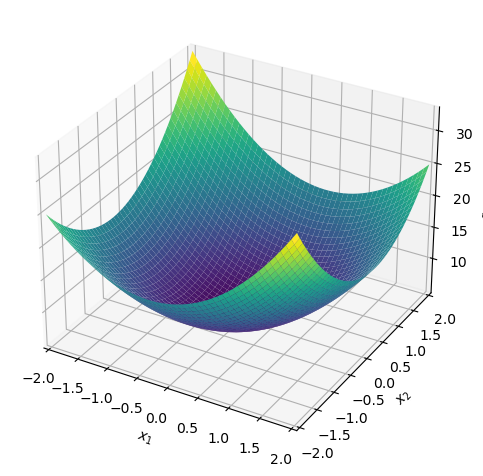

In [64]:
from sympy.plotting import plot3d
plot3d(f, (x1, -2,2), (x2, -2,2))

----------------